# CUSTOMER CHURN PREDICTIONON

# Import the necessary modules

In [67]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data and Exploring data

In [68]:
data = pd.read_csv('Churn_Modelling.csv')

In [69]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
data.shape

(10000, 14)

# Data Preprocessing

In [71]:
data.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [72]:
cols_to_drop=['RowNumber','Exited','Surname']
y = data['Exited']


features = data.drop(cols_to_drop,axis = 1)
features = pd.get_dummies(features, columns=['Geography', 'Gender'], drop_first=True)
features

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,15584532,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,True,False,True


# Data Visualization

<Axes: xlabel='Exited', ylabel='count'>

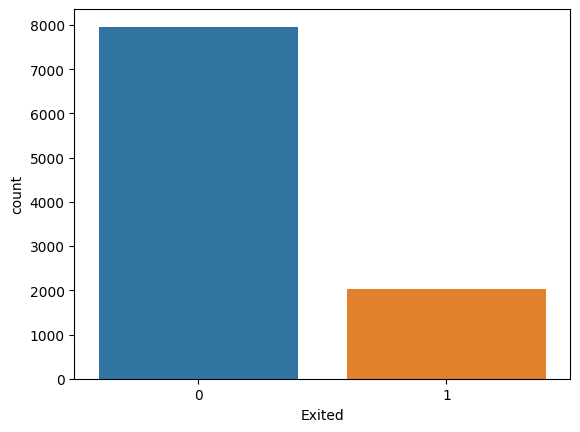

In [73]:
sns.countplot(data = data,x= 'Exited')

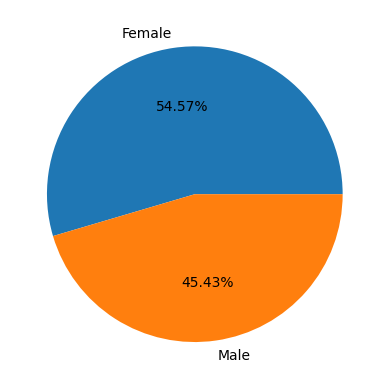

In [74]:
key = ['Female','Male']
plt.pie(data['Gender'].value_counts(),labels = key,autopct = '%1.2f%%')
plt.show()

# Data splitting

In [75]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(features,y,random_state=1,test_size=0.3)

# Model Training

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Model Evaluation

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
yhat = model.predict(x_train)
accuracy = accuracy_score(y_train,yhat)


print(f'The accuracy of x_train = {accuracy*100 :0.1f}')

The accuracy of x_train = 79.9


In [79]:
model.fit(x_test,y_test)
yhat_test = model.predict(x_test)
accuracy = accuracy_score(y_test,yhat_test)


print(f'The accuracy of x_train = {accuracy*100 :0.1f}')

The accuracy of x_train = 79.1
